# Financial Project 

## The Data

Revolving credit 

### Business Objective:

Revolving credit means you're borrowing against a line of credit. Let's say a lender extends a
certain amount of credit to you, against which you can borrow repeatedly. The amount of
credit you're allowed to use each month is your credit line, or credit limit. You're free to use as
much or as little of that credit line as you wish on any purchase you could make with cash. Its
just like a credit card and only difference is they have lower interest rate and they are secured
by business assets.
At the end of each statement period, you receive a bill for the balance. If you don't pay it
off in full, you carry the balance, or revolve it, over to the next month and pay interest on
any remaining balance. As you pay down the balance, more of your credit line becomes
available and usually its useful for small loans
As a bank or investor who are into this revolving balance here they can charge higher
interest rates and convenience fees as there is lot of risk associated in customer paying
the amount. Our company wants to predict the revolving balance maintained by the
customer so that they can derive marketing strategies individually.

### Acceptance criteria:

Should get the least possible RMSE and the model should be deployed
using Flask/ RShiny/Heroku.

### Data Overview

----
-----
Here is the information on this particular Revolving credit data set:

Data Set Details: This dataset consists of 2300 observations

###### member_id ---- unique ID assigned to each member
###### loan_amnt ---- loan amount (doller) applied by the member
###### terms: ---- term of loan (in months)
###### batch_ID ---- batch numbers allotted to members
###### Rate_of_intrst: ---- interest rate (%) on loan
###### Grade: ---- grade assigned by the bank
###### sub_grade: ---- grade assigned by the bank
###### emp_designation ---- job / Employer title of member
###### Experience: ---- employment length, where 0 means less than one year and 10 means ten or more years
###### home_ownership ---- status of home ownership
###### annual_inc: ---- annual income (doller) reported by the member
###### verification_status ---- status of income verified by the bank
###### purpose ---- purpose of loan
###### State: ---- living state of member
###### debt-to-income ratio : ---- ratio of member's total monthly debt
###### Delinquency of past 2 years: ---- ( failure to pay an outstanding debt by due date)
###### inq_6mths: ---- Inquiries made in past 6 months
###### total_months_delinq : ---- number of months since last delinq
###### Nmbr_months_last_record: ---- number of months since last public record
###### Numb_credit_lines: ---- number of open credit line in member's credit line
###### pub_rec ---- number of derogatory public records
###### Tota_credit_revolving_balance: ---- total credit revolving balance
###### total_credits: ---- total number of credit lines available in members credit line
###### list_status ---- unique listing status of the loan - W(Waiting),F(Forwarded)
###### int_rec: ---- Total interest received till date
###### late_fee_rev: ---- Late fee received till date
###### recov_chrg: ---- post charge off gross recovery
###### collection_recovery_fee ---- post charge off collection fee
###### exc_med_colle_12mon: ---- number of collections in last 12 months excluding medical collections
###### since_last_major_derog: ---- months since most recent 90 day or worse rating
###### application_type ---- indicates when the member is an individual or joint
###### verification_status_joint ---- indicates if the joint members income was verified by the bank
###### last_pay_week: ---- indicates how long (in weeks) a member has paid EMI after batch enrolled
###### nmbr_acc_delinq: ---- number of accounts on which the member isdelinquent
###### colle_amt: ---- total collection amount ever owed
###### curr_bal: ---- total current balance of all accounts

# Starter Code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

** Using pandas to read Report.csv as a dataframe called dataset.**

In [2]:
dataset = pd.read_csv("/Users/Ankan/Desktop/DataScience/GitHub/New-Tariff-Rule-/2. Financial Analysis/Report.csv",encoding='latin1')

/Users/Ankan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


** Check out the info(), head(),columns,shape,type,len and describe() methods on dataset.**

In [3]:
# dataset.head()

In [4]:
# dataset.describe()

In [5]:
# dataset.info()

In [127]:
dataset.nunique()

member_id                      887379
loan_amnt                        1372
terms                               2
batch_ID                          207
Rate_of_intrst                    542
grade                               7
sub_grade                          35
Emp_designation                289207
Experience                         11
home_ownership                      6
annual_inc                      49384
verification_status                 3
purpose                            14
State                              51
debt_income_ratio                4086
delinq_2yrs                        29
inq_last_6mths                     28
mths_since_last_delinq            155
mths_since_last_record            123
numb_credit                        77
pub_rec                            32
total revol_bal                 73740
total_credits                     135
initial_list_status                 2
total_rec_int                  324635
total_rec_late_fee               6106
recoveries  

In [7]:
# type(dataset)

In [8]:
# len(dataset)

In [9]:
# dataset.shape

In [10]:
# dataset.columns

# Project Starts

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

In [11]:
df = dataset.copy()

In [12]:
# sns.countplot(x='verification_status',data=df)

###### Source verified and verified must be having a similar understanding so we need to rename the source verified data

In [13]:
# sns.countplot(x='grade',data=df)

In [14]:
# dataset['loan_amnt '].describe()

In [15]:
# plt.figure(figsize=(12,4))
# sns.distplot(dataset.iloc[:,1],kde=False,bins=40)
# plt.xlim(0,45000)

###### Trying to find out the correlation between the continuous feature variables using .corr() method.

In [16]:
df.corr()

,member_id,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,...,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
member_id,1.000000,0.064461,-0.142205,0.034146,0.067824,0.049904,-0.127257,-0.008682,-0.158700,0.088838,...,0.031692,-0.461098,-0.076388,-0.114473,-0.072818,0.051445,0.056087,0.016961,0.004292,0.007997
loan_amnt,0.064461,1.000000,0.145023,0.332698,0.020675,-0.000159,-0.034168,-0.038080,-0.010734,0.198906,...,0.222639,0.533916,0.031395,0.073150,0.052205,-0.016650,-0.037278,0.003947,-0.004275,0.328782
Rate_of_intrst,-0.142205,0.145023,1.000000,-0.072786,0.079903,0.055178,0.227650,-0.030033,0.022485,-0.010381,...,-0.038618,0.445679,0.057150,0.106840,0.070867,0.013336,-0.011180,0.026478,0.001130,-0.091408
annual_inc,0.034146,0.332698,-0.072786,1.000000,-0.087410,0.047470,0.035193,-0.050350,-0.096151,0.138392,...,0.187335,0.128535,0.013500,0.007717,0.006630,-0.003936,-0.037394,0.014775,0.001096,0.418332
debt_income_ratio,0.067824,0.020675,0.079903,-0.087410,1.000000,-0.002831,-0.008106,0.001447,0.065933,0.144250,...,0.108056,0.008380,-0.005748,0.001162,0.002159,-0.000292,0.007736,0.003205,-0.002084,-0.007282
delinq_2yrs,0.049904,-0.000159,0.055178,0.047470,-0.002831,1.000000,0.021375,-0.562654,-0.088179,0.051189,...,0.122713,0.001665,0.017432,-0.000729,0.000989,0.063016,-0.424556,0.130326,0.000207,0.064762
inq_last_6mths,-0.127257,-0.034168,0.227650,0.035193,-0.008106,0.021375,1.000000,0.014748,-0.086349,0.111235,...,0.135584,0.085585,0.031637,0.045590,0.034007,0.006850,0.020546,-0.005329,0.003171,0.034338
mths_since_last_delinq,-0.008682,-0.038080,-0.030033,-0.050350,0.001447,-0.562654,0.014748,1.000000,0.019038,-0.043182,...,-0.044920,-0.028208,-0.021321,-0.004525,-0.005180,-0.035834,0.699356,-0.139118,0.006466,-0.093911
mths_since_last_record,-0.158700,-0.010734,0.022485,-0.096151,0.065933,-0.088179,-0.086349,0.019038,1.000000,0.012445,...,-0.177856,0.083147,-0.025561,0.013120,0.002846,-0.020923,0.034511,-0.015947,-0.059586,-0.026634
numb_credit,0.088838,0.198906,-0.010381,0.138392,0.144250,0.051189,0.111235,-0.043182,0.012445,1.000000,...,0.695075,0.061223,-0.009606,0.001560,0.003217,0.009610,0.009059,0.017752,0.000124,0.244134


###### Visualizing this using a heatmap

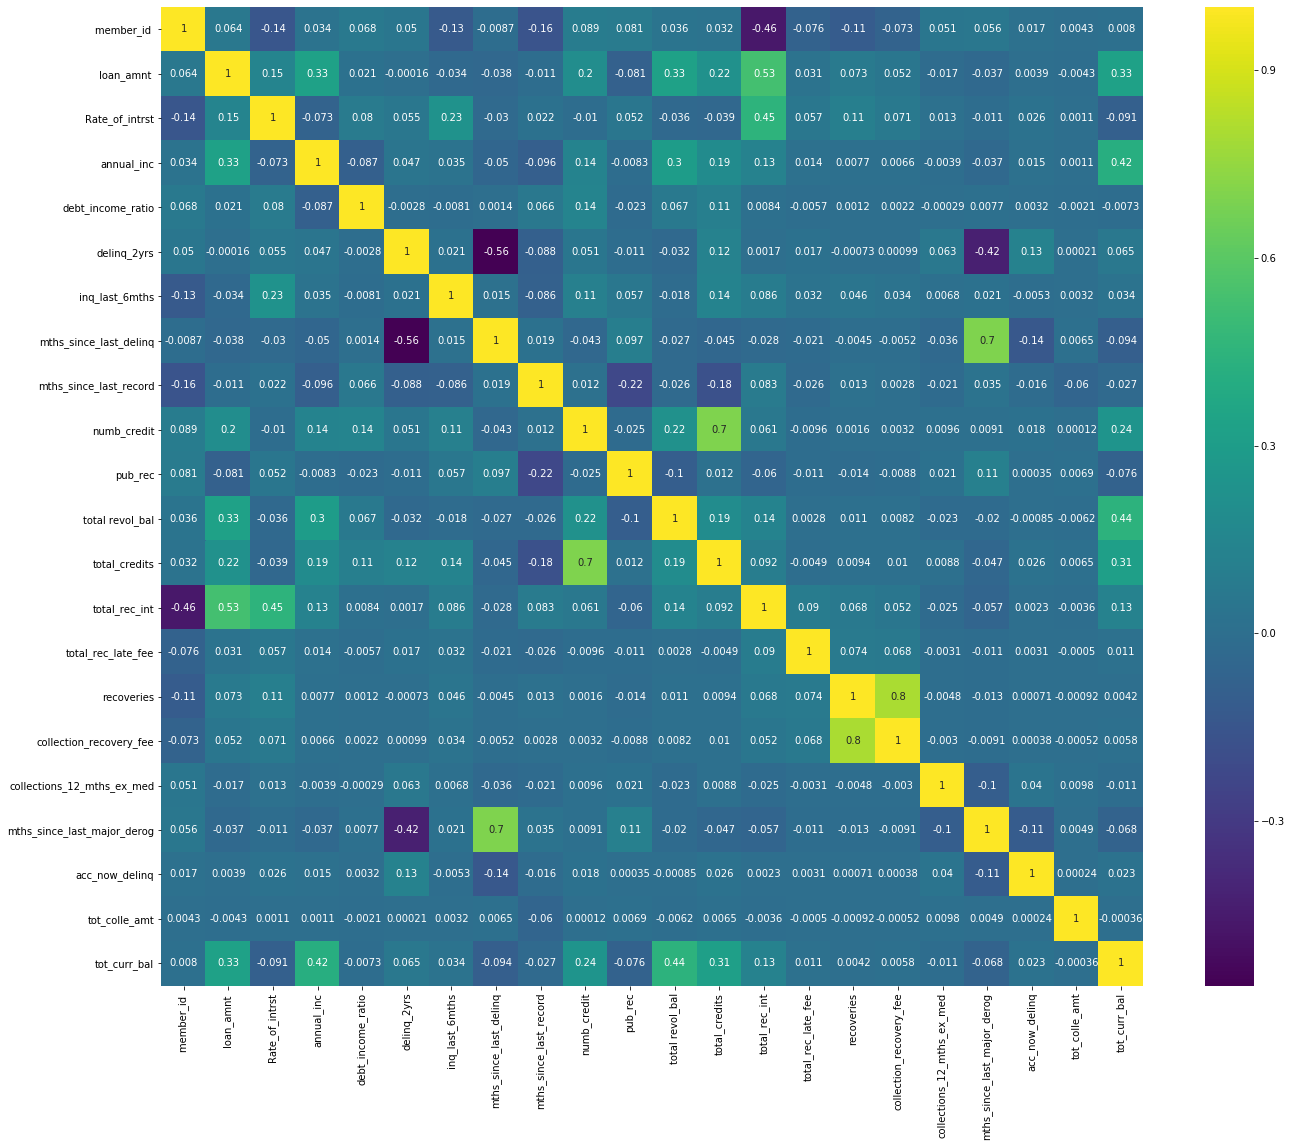

In [17]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

###### We can see a high corelation between recoveries & collection_recovery_fee, so we will see the posiblity of any colinearity 

In [18]:
# plt.figure(figsize=(12,6))
# sns.scatterplot(x='recoveries',y='collection_recovery_fee',data=df,)

Creating a boxplot showing the relationship between the grade and the loan_amnt

In [19]:
# plt.figure(figsize=(12,6))
# sns.boxplot(x='grade',y='loan_amnt ',data=df)

In [20]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='total_credits',y='numb_credit',data=df)

This is quite evident that the number of credit is linearly corelated with the total credit 

In [21]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='loan_amnt ',y='total revol_bal',data=df)

there is an incrimental relationship between the revolving balance and loan amount

In [22]:
# df.sort_values('total revol_bal',ascending=False).head(20)

In [23]:
# sns.boxplot(x='terms',y='loan_amnt ',data=df)

In [24]:
df.corr()['total revol_bal']

member_id                      0.036416
loan_amnt                      0.333580
Rate_of_intrst                -0.035708
annual_inc                     0.295784
debt_income_ratio              0.067277
delinq_2yrs                   -0.032486
inq_last_6mths                -0.017556
mths_since_last_delinq        -0.026798
mths_since_last_record        -0.025639
numb_credit                    0.224542
pub_rec                       -0.100609
total revol_bal                1.000000
total_credits                  0.189105
total_rec_int                  0.137380
total_rec_late_fee             0.002774
recoveries                     0.010828
collection_recovery_fee        0.008151
collections_12_mths_ex_med    -0.022854
mths_since_last_major_derog   -0.019765
acc_now_delinq                -0.000855
tot_colle_amt                 -0.006219
tot_curr_bal                   0.442036
Name: total revol_bal, dtype: float64

In [25]:
# df.groupby('initial_list_status')['total revol_bal'].describe()

###### The Grade and SubGrade columns that Revolving credit attributes to the loans and find out what are the unique possible grades and subgrades

In [26]:
# sorted(df['grade'].unique())

In [27]:
# sorted(df['sub_grade'].unique())

In [28]:
# plt.figure(figsize=(10,6))
# sns.countplot(x='grade',data=df,hue='terms')

In [29]:
# plt.figure(figsize=(12,4))
# subgrade_order = sorted(df['sub_grade'].unique())
# sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

In [30]:
# plt.figure(figsize=(12,4))
# subgrade_order = sorted(df['sub_grade'].unique())
# sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='terms_status')

###### It looks like F and G subgrades usually get higher term often. Isloate those and recreate the countplot just for those subgrades.

In [31]:
# f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

# plt.figure(figsize=(12,4))
# subgrade_order = sorted(f_and_g['sub_grade'].unique())
# sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='terms_status')

In [32]:
# df['terms'].unique()

In [33]:
df['terms_status'] = df['terms'].map({'36 months':1,'60 months':0})

In [34]:
df[['terms_status','terms']]

,terms_status,terms
0,1,36 months
1,1,36 months
2,1,36 months
3,1,36 months
4,1,36 months
...,...,...
887374,1,36 months
887375,0,60 months
887376,0,60 months
887377,1,36 months


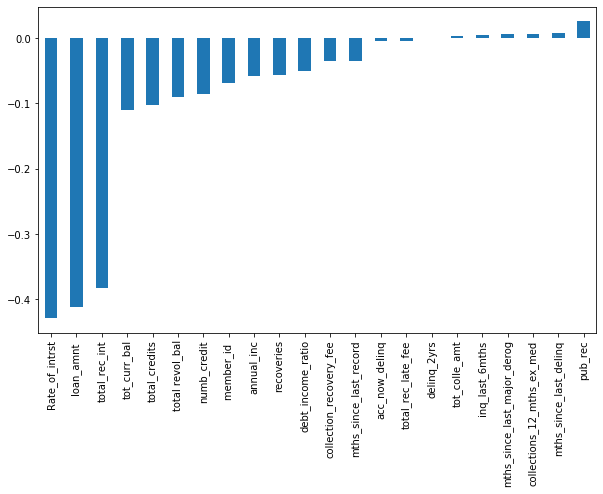

In [35]:
plt.figure(figsize=(10,6))
df.corr()['terms_status'].sort_values().drop('terms_status').plot(kind='bar')

In [36]:
df.drop('terms',axis=1,inplace=True)

In [37]:
# dataset["application_type"]= dataset["application_type"].astype(str)

# Missing Data

**Will be exploring the missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [38]:
dataset.isnull().sum()

member_id                           0
loan_amnt                           0
terms                               0
batch_ID                       130748
Rate_of_intrst                      0
grade                               0
sub_grade                           0
Emp_designation                 51462
Experience                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
State                               0
debt_income_ratio                   0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
numb_credit                        29
pub_rec                            29
total revol_bal                     0
total_credits                      29
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries  

In [39]:
100*dataset.isnull().sum()/len(dataset)

member_id                       0.000000
loan_amnt                       0.000000
terms                           0.000000
batch_ID                       14.734178
Rate_of_intrst                  0.000000
grade                           0.000000
sub_grade                       0.000000
Emp_designation                 5.799326
Experience                      5.051393
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
purpose                         0.000000
State                           0.000000
debt_income_ratio               0.000000
delinq_2yrs                     0.003268
inq_last_6mths                  0.003268
mths_since_last_delinq         51.197065
mths_since_last_record         84.555303
numb_credit                     0.003268
pub_rec                         0.003268
total revol_bal                 0.000000
total_credits                   0.003268
initial_list_status             0.000000
total_rec_int   

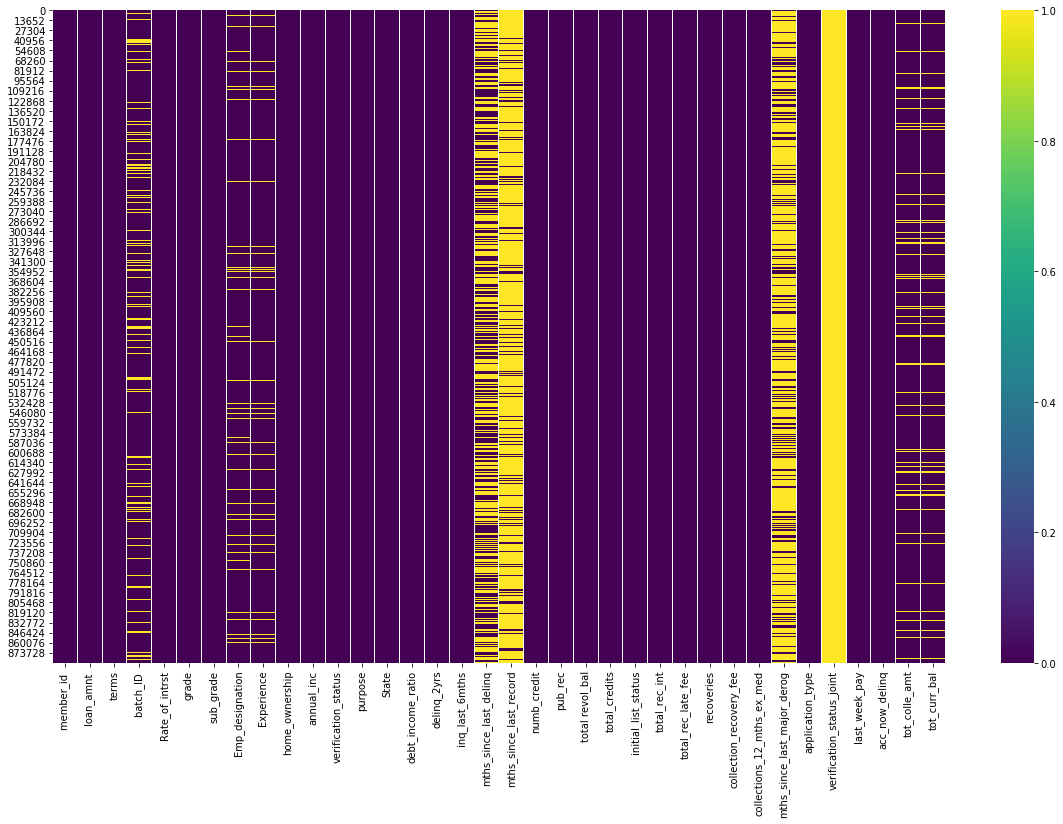

In [40]:
plt.figure(figsize=(20,12))
sns.heatmap(dataset.isnull(),cmap='viridis')

It is quite evident that there are quite a number of variable which are missing values as per the heatmap. So will we try to see the percentage of all the missing data's. specially for 

[batch_ID, Emp_designation, Experience, mths_since_last_delinq, mths_since_last_record, mths_since_last_major_derog, verification_status_joint, tot_colle_amt, tot_curr_bal]

#### Let's examine Emp_designation and Experience to see whether it will be okay to drop them.

In [41]:
dataset.iloc[:,7:9].describe()

,Emp_designation,Experience
count,835917,842554
unique,289207,11
top,Teacher,10+ years
freq,13807,291569


In [42]:
dataset.iloc[:,7].value_counts()

Teacher                         13807
Manager                         11638
Registered Nurse                 5691
Owner                            5512
RN                               5491
                                ...  
Admin  Assistant                    1
GIS Proposal Writer                 1
markeeting                          1
Ablitt Scofield, P.C.               1
Program Manager, Marketplace        1
Name: Emp_designation, Length: 289207, dtype: int64

Realistically there are too many unique job titles to try to convert them to a dummy variable feature. once we will try to catagorise it by the total salary and see the fisibility  or else we will remove that Emp_designation column

In [43]:
df = df.drop('Emp_designation',axis=1)

In [44]:
df = df.drop('batch_ID ',axis=1)

In [45]:
df[df.isnull()['annual_inc']]

,member_id,loan_amnt,Rate_of_intrst,grade,sub_grade,Experience,home_ownership,annual_inc,verification_status,purpose,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal,terms_status
170053,70735,6500,8.38,A,A5,< 1 year,NONE,NaN,Not Verified,other,...,0.0,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,1
198875,79906,7000,7.75,A,A3,< 1 year,NONE,NaN,Not Verified,other,...,0.0,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,1
402854,79878,6700,7.75,A,A3,< 1 year,NONE,NaN,Not Verified,other,...,0.0,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,1
683144,79912,5000,7.43,A,A2,< 1 year,NONE,NaN,Not Verified,other,...,0.0,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,1


### Imputation of annual_inc based on Experience (Mean)

In [46]:
df.groupby('Experience').mean()['annual_inc']

Experience
1 year       70748.110372
10+ years    82174.436606
2 years      72609.851140
3 years      73368.146041
4 years      73780.017954
5 years      74342.253926
6 years      74409.918172
7 years      74656.919133
8 years      75994.317057
9 years      75709.135389
< 1 year     70283.769190
Name: annual_inc, dtype: float64

In [47]:
total_Experience_avg = df.groupby('Experience').mean()['annual_inc']

In [48]:
type(total_Experience_avg)

pandas.core.series.Series

In [49]:
total_Experience_avg[4]

73780.01795389215

In [50]:
def fill_annual_inc(Experience,annual_inc):
    '''
    Accepts the Experience and annual_inc values for the row.
    Checks if the annual_inc is NaN , if so, it returns the avg annual_inc value
    for the corresponding Experience value for that row.
    
    total_Experience_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of annual_inc per Experience values.
    '''
    if np.isnan(annual_inc):
        return total_Experience_avg[Experience]
    else:
        return annual_inc

In [51]:
df['annual_inc'] = df.apply(lambda x: fill_annual_inc(x['Experience'], x['annual_inc']), axis=1)

### Imputation of delinq_2yrs & inq_last_6mths based on Experience (Mean)

In [52]:
df.isnull()['delinq_2yrs'].sum()

29

In [53]:
df.groupby('Experience')['delinq_2yrs'].mean()

Experience
1 year       0.322234
10+ years    0.360975
2 years      0.325489
3 years      0.291015
4 years      0.270175
5 years      0.271255
6 years      0.277026
7 years      0.279544
8 years      0.298737
9 years      0.303670
< 1 year     0.288353
Name: delinq_2yrs, dtype: float64

In [54]:
total_Experience_delinq_2yrs_avg = df.groupby('Experience').mean()['delinq_2yrs']

def fill_delinq_2yrs(Experience,delinq_2yrs):
    
    if np.isnan(delinq_2yrs):
        return total_Experience_delinq_2yrs_avg[Experience]
    else:
        return delinq_2yrs
    

In [55]:
df['delinq_2yrs'] = df.apply(lambda x: fill_delinq_2yrs(x['Experience'], x['delinq_2yrs']), axis=1)

In [56]:
df.isnull()['inq_last_6mths'].sum()

29

In [57]:
df.groupby('Experience')['inq_last_6mths'].mean()

Experience
1 year       0.709977
10+ years    0.681760
2 years      0.702507
3 years      0.703987
4 years      0.709475
5 years      0.710434
6 years      0.722462
7 years      0.705633
8 years      0.688136
9 years      0.666696
< 1 year     0.706787
Name: inq_last_6mths, dtype: float64

In [58]:
total_Experience_inq_last_6mths_avg = df.groupby('Experience').mean()['inq_last_6mths']

def fill_inq_last_6mths(Experience,inq_last_6mths):
    
    if np.isnan(inq_last_6mths):
        return total_Experience_inq_last_6mths_avg[Experience]
    else:
        return inq_last_6mths

In [59]:
df['inq_last_6mths'] = df.apply(lambda x: fill_inq_last_6mths(x['Experience'], x['inq_last_6mths']), axis=1)

### Reassigning the years values 

In [60]:
df['Experience'].unique()

array(['9 years', '< 1 year', '2 years', '10+ years', '5 years',
       '8 years', '7 years', '4 years', nan, '1 year', '3 years',
       '6 years'], dtype=object)

In [61]:
df['Experience_status'] = df['Experience'].map({'9 years':9, '< 1 year':0, '2 years':2, '10+ years':10, '5 years':5,
       '8 years':8, '7 years':7, '4 years':4,'1 year':1, '3 years':3,
       '6 years':6})

In [62]:
df[['Experience_status','Experience']]

,Experience_status,Experience
0,9.0,9 years
1,0.0,< 1 year
2,2.0,2 years
3,10.0,10+ years
4,10.0,10+ years
...,...,...
887374,1.0,1 year
887375,1.0,1 year
887376,10.0,10+ years
887377,0.0,< 1 year


### Imputation of Experience based on sub_grade (Mean)

In [63]:
df.groupby('sub_grade')['Experience_status'].mean()

sub_grade
A1    6.073319
A2    5.902944
A3    5.972700
A4    5.968094
A5    5.999650
B1    6.066692
B2    6.029258
B3    6.016168
B4    5.967696
B5    5.957415
C1    5.956780
C2    5.982320
C3    6.036376
C4    6.040518
C5    6.056668
D1    5.994063
D2    5.985297
D3    5.974709
D4    5.998885
D5    6.047207
E1    6.019698
E2    6.037211
E3    6.026635
E4    6.068645
E5    6.122066
F1    6.076003
F2    6.097651
F3    6.078353
F4    6.140313
F5    6.233641
G1    5.957494
G2    6.009687
G3    5.945802
G4    6.108192
G5    6.220826
Name: Experience_status, dtype: float64

In [64]:
total_sub_grade_Experience_status_avg = df.groupby('sub_grade').mean()['Experience_status']

def fill_Experience_status(sub_grade,Experience_status):
    
    if np.isnan(Experience_status):
        return total_sub_grade_Experience_status_avg[sub_grade]
    else:
        return Experience_status

In [65]:
df['Experience_status'] = df.apply(lambda x: fill_Experience_status(x['sub_grade'], x['Experience_status']), axis=1)

In [66]:
df['Experience_status'] = df['Experience_status'].astype(int)

In [67]:
df.drop('Experience',axis=1,inplace=True)

### Imputation of tot_curr_bal based on loan_amnt (Mean)

In [68]:
df['tot_curr_bal'].describe()

count    8.171030e+05
mean     1.394582e+05
std      1.537500e+05
min      0.000000e+00
25%      2.985300e+04
50%      8.055900e+04
75%      2.082050e+05
max      8.000078e+06
Name: tot_curr_bal, dtype: float64

In [69]:
df.corr()['tot_curr_bal']

member_id                      0.007997
loan_amnt                      0.328782
Rate_of_intrst                -0.091408
annual_inc                     0.418332
debt_income_ratio             -0.007282
delinq_2yrs                    0.064762
inq_last_6mths                 0.034338
mths_since_last_delinq        -0.093911
mths_since_last_record        -0.026634
numb_credit                    0.244134
pub_rec                       -0.075814
total revol_bal                0.442036
total_credits                  0.311074
total_rec_int                  0.132343
total_rec_late_fee             0.011371
recoveries                     0.004210
collection_recovery_fee        0.005772
collections_12_mths_ex_med    -0.010984
mths_since_last_major_derog   -0.068377
acc_now_delinq                 0.023394
tot_colle_amt                 -0.000355
tot_curr_bal                   1.000000
terms_status                  -0.110343
Experience_status              0.098428
Name: tot_curr_bal, dtype: float64

###### As there is a good corelation among annual_inc and tot_curr_bal, so we will try to impute the total current balance based on the annual income. When even logically seem right as maintaining current balance depends on the income of the person but even after imputing we were stil left with some missing data points so we again repeated the same step with loan_amnt.

In [70]:
df.groupby('loan_amnt ')['tot_curr_bal'].mean()

loan_amnt 
500                NaN
550                NaN
600                NaN
700                NaN
725                NaN
             ...      
34900    306472.307692
34925    328979.000000
34950    155378.444444
34975    294090.821429
35000    287250.480523
Name: tot_curr_bal, Length: 1372, dtype: float64

In [71]:
total_loan_amnt_tot_curr_bal_avg = df.groupby('loan_amnt ').mean()['tot_curr_bal']

def fill_tot_curr_bal(loan_amnt,tot_curr_bal):
    
    if np.isnan(tot_curr_bal):
        return total_loan_amnt_tot_curr_bal_avg[loan_amnt]
    else:
        return tot_curr_bal

In [72]:
df['tot_curr_bal'] = df.apply(lambda x: fill_tot_curr_bal(x['loan_amnt '], x['tot_curr_bal']), axis=1)

In [74]:
values = {'mths_since_last_delinq': 0, 'mths_since_last_record': 0, 'mths_since_last_major_derog': 0}
df.fillna(value=values,inplace=True)

### Reassigning the verification_status_joint & verification_status values to 0 or 1

In [75]:
df['verification_status_joint'] = df['verification_status_joint'].map({'Verified':1, 'Not Verified':0, 'Source Verified':1})

In [76]:
values_1 = {'verification_status_joint': 0}
df.fillna(value=values_1,inplace=True)

In [77]:
df['verification_status_joint'].unique()

array([0., 1.])

In [78]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [79]:
df['verification_status'] = df['verification_status'].map({'Verified':1, 'Not Verified':0, 'Source Verified':1})

In [80]:
df['verification_status'].unique()

array([1, 0])

### Imputation of tot_colle_amt NA values to 0 (based on mode of that feature)

In [111]:
values_2 = {'tot_colle_amt': 0}
df.fillna(value=values_2,inplace=True)

**Still few of the feature sets has few missing data points, but they account for less than 0.5% of the total data. so will ahead and remove the rows that are missing those values in those columns with dropna().**

In [117]:
df = df.dropna()

# Feature Engineering required for last_week_pay

## Categorical Variables and Dummy Variables

**As we are done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [121]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'purpose', 'State',
       'initial_list_status', 'application_type', 'last_week_pay'],
      dtype='object')

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [122]:
df = df.drop('grade',axis=1)

**We will be Converting the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. We will drop the original subgrade column and add drop_first=True to your get_dummies call.**

In [123]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [124]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [125]:
df.columns

Index(['member_id ', 'loan_amnt ', 'Rate_of_intrst', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'State',
       'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'numb_credit',
       'pub_rec', 'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_colle_amt', 'tot_curr_bal', 'terms_status', 'Experience_status',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [126]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'purpose', 'State', 'initial_list_status',
       'application_type', 'last_week_pay'],
      dtype='object')

### Application_type, initial_list_status, purpose 
**Now we will be Converting these columns: ['application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. We will be using the drop_first=True to drop the original columns.**

In [129]:
dummies = pd.get_dummies(df[['application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [130]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'State', 'last_week_pay'], dtype='object')

### home_ownership

In [131]:
df['home_ownership'].value_counts()

MORTGAGE    443495
RENT        356024
OWN          87455
OTHER          180
NONE            44
ANY              3
Name: home_ownership, dtype: int64

In [132]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies_1 = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies_1],axis=1)

In [133]:
df.select_dtypes(['object']).columns

Index(['State', 'last_week_pay'], dtype='object')

### State

In [134]:
dummies_2 = pd.get_dummies(df['State'],drop_first=True)
df = df.drop(['State'],axis=1)
df = pd.concat([df,dummies_2],axis=1)

In [135]:
df.select_dtypes(['object']).columns

Index(['last_week_pay'], dtype='object')

### last_week_pay

In [181]:
df = df.drop('last_week_pay_nos',axis=1)

In [182]:
df['last_week_pay_nos'] = df['last_week_pay'].apply(lambda last_week_pay:last_week_pay[:2])

In [184]:
df['last_week_pay_nos'] = df['last_week_pay_nos'].replace(['9t','4t','0t','8t','NA'],['9','4','0','8','0'])

In [185]:
df['last_week_pay_nos'].unique()

13    73346
9     47680
26    46841
22    43932
4     43104
35    40161
10    39876
39    39762
17    38365
31    35383
48    32184
52    32161
65    31865
61    30419
15    26269
78    23516
74    22383
11    22098
0     18953
87    18695
12    18462
91    18014
44    17502
83    16265
70    16066
43    13713
57    12979
96    11264
14    11148
16    10946
56     8459
30     5736
95     4465
18     3553
82     3180
69     2193
21     1413
8      1028
20     1005
19      754
23      717
24      485
92      376
25      334
79      126
27       20
29        3
28        2
Name: last_week_pay_nos, dtype: int64

In [207]:
df = df.drop(['last_week_pay'],axis=1)

In [209]:
df = df.drop(['member_id '],axis=1)

In [210]:
df.columns

Index(['loan_amnt ', 'Rate_of_intrst', 'annual_inc', 'verification_status',
       'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'numb_credit',
       ...
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY',
       'last_week_pay_nos'],
      dtype='object', length=128)

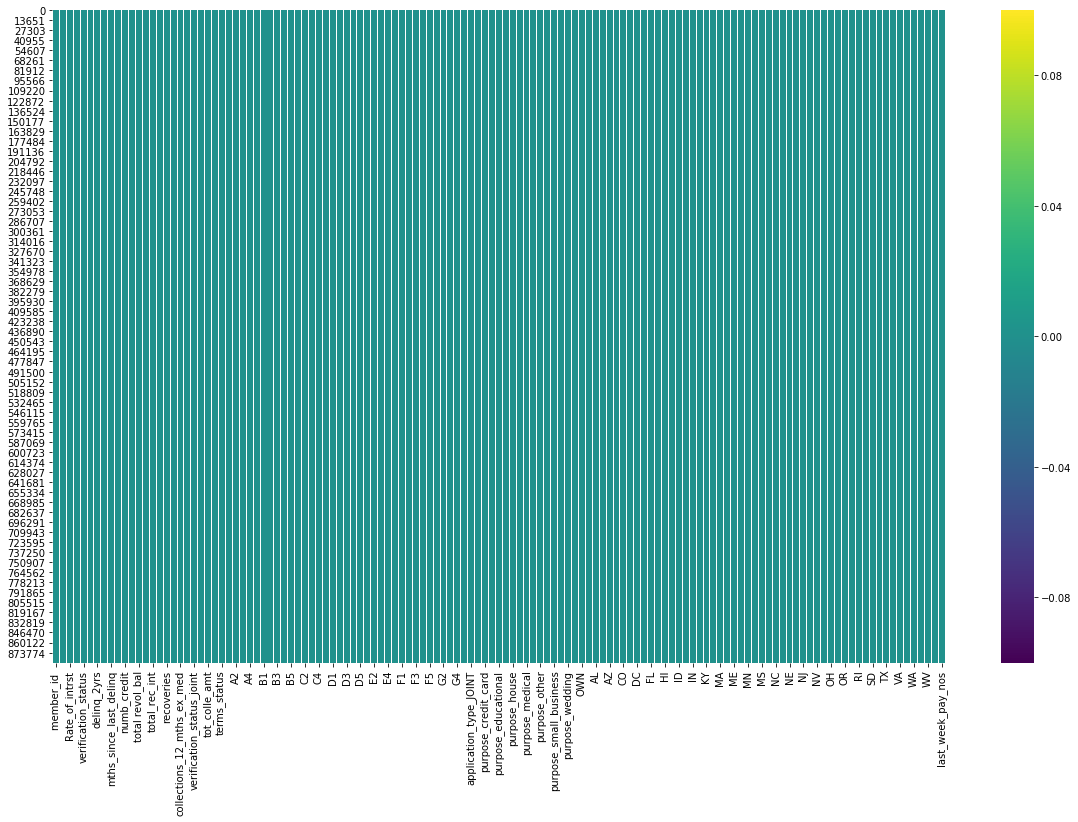

In [191]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull(),cmap='viridis')

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Useing .sample() to grab a sample of the 870k+ entries to save time on training. Highly recommended for lower RAM computers or if we are not using GPU.

----
----

In [205]:
df2 = df.sample(frac=0.5,random_state=101)
print(len(df2))

443600


## Scaling and Train Test Split

In [220]:
X = df2.drop('total revol_bal',axis=1)
y = df2['total revol_bal']

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [223]:
from sklearn.preprocessing import MinMaxScaler

In [224]:
scaler = MinMaxScaler()

In [225]:
X_train= scaler.fit_transform(X_train)

In [226]:
X_test = scaler.transform(X_test)

In [227]:
X_train.shape

(310520, 128)

In [228]:
X_test.shape

(133080, 128)

## Creating a Model